<div align='center'><a href='https://www.facebook.com/fea.dev/'/ style='display:inline-block'>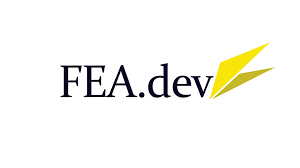<a/><div/>

# <font color=blue|blue|red>**Jupyter Notebook**</font> 
### 1) O que é o Jupyter Notebook?
O Jupyter Notebook é um documento que permite você executar códigos em Python e escrever textos como um word, tudo em um mesmo lugar.

### 2) Como eu faço para rodar o código?
Para rodar uma célula basta clicar na célula e precionar **Shift + Enter**. Você também pode rodar uma célula ou mais de uma pelo menu de opções na aba "Cell". A células são os retângulos, que podem conter um código em Python ou um texto escrito.

Caso você clique nos textos e a formatação dele fique estranha basta rodar essa célula para corrigir.


### 3) Porquê eu posso obter diferentes resultados toda vez que eu rodo a mesma célula?
Quando você roda uma célula isso atualiza alguma variável (ex, x = x+1), assim você terá resultados diferentes para x enquanto você rodar várias vezes essa célula.

### 4) Estou travado em algum exercício, o que eu faço?
Nós recomendamos que você busca alguem do FEA.dev ou busque informações no Google ou no Stack Overflow. 

### 5) Como eu salvo o meu progresso?
Clique em "File" na barra de opções e por fim clique na opção "Save and Checkpoit"

### 6) O que devo fazer se o meu Jupyter travar?
Caso isso acontece você pode tentar reiniciar o Kernel clicando em "Kernel" na barra de opções, e por fim selecionando a opção "Restart"

### 7) Ainda estou com dúvidas sobre o Jupyter.
Caso isso ocorra pode nos chamar ou se preferir pode assistir o seguinte vídeo: https://www.youtube.com/watch?v=dPb4acFiaYs

# <font color = blue|blue|red >**Aula 05: Drawdowns**</font> 
## <font color=blue|blue|red>O que esperar do Curso?</font>

Bem vindo(a) ao Curso de Finanças Quantitativas em Python do FEA.dev. <ins>**_O obejtivo desse curso é ensinar à você como construir e gerir uma carteira de investimento de forma sistematizada_**</ins>. Para isso vamos abordar temas como criação e gestão de portfólio; extração de dados; visualização de dados; análise de risco, entre outros, tudo isso utilizando Python.


### <font color=green|black>**Tópicos da Aula:** </font>
- Drawdown
- Maximum Drawdown
- Como computar os Drawdowns

### <font color=green|black>**Atenção:** </font>
Para essa aula do curso é interessante que já tenha estudado os outros tópicos do nosso curso, pois utilizaremos de conceitos e dados já apresentados em outras aulas. Caso não tenha, assista nossa playlist de Finanças Quantitativas:
- https://www.youtube.com/playlist?list=PLiJqHBsOKi2cabSus1hgdSNAHeU0md6_D

### <font color=green|black>**Tenho Dúvidas!** </font>
Caso tenha qualquer dúvida <ins>**_sinta-se livre para chamar qualquer um dos nossos membros pelo nosso Instagram ou email_**</ins>. Além disso, outra ótima ferramenta para se tirar dúvidas e fazer pesquisas é o Stack Overflow. Lembrando que se possível, quando for pesquisar no Google, é recomendado que a faço em inglês, devido a maior disponibilidade de informações.
> Email: duvidas.feadev@gmail.com

> Instagram: https://www.instagram.com/fea.dev/

# <font color = blue|blue|red >**Drawdown**</font> 

## <font color = blue|blue|red > O que é Drawdown? </font> 
Drawdown (medida de declínio) é uma <ins>**_medida de risco_**</ins>, é obtido como a perda que você poderia experenciar comprando um ativo em seu valor máximo (chamaremos de pico) e vender o mesmo em seu valor mínimo. Ou seja, durante um período de tempo, investindo no mesmo ativo, teremos vários drawdowns, devido as altas e baixas daquele investimento.

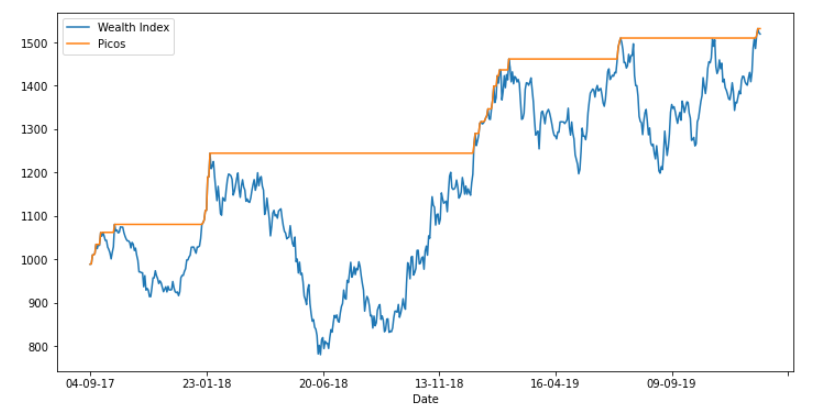

## <font color = blue|blue|red >**Qual desses valores usaremos de medida?**</font> 

### <font color=green|black>**Maximum Drawdown** </font> 
É a perda máxima, de uma ação ou estratégia, que você poderia experenciar. Caso deixasse um montante em um investimento durante um período de tempo, seria o pior retorno possível, como se tivesse comprado uma ação no máximo e vendido no mínimo.

### <font color = green|black >**Por que não usar a volatilidade apenas?**</font>

A volatilidade não é necessariamente uma medida de risco ruim, porém ela acaba não medindo apenas o risco de perder capital, já que como é uma medida de dispersão pode ir tanto para cima quanto para baixo, então o Drawdown é bastante utilizado para suprir a necessidade de observar apenas perdas.


 

# <font color = blue|blue|red >**Computando Drawdowns**</font>

### <font color = green|black >**Partindo dos retornos de um ativo temos três passos:**</font>
- 1º Wealth Index
- 2º Picos
- 3º Drawdowns
<img src = "https://media4.giphy.com/media/LmNwrBhejkK9EFP504/giphy.gif" style = "height:200px; width:200px" />

### <font color = green|black >**Importando Pandas:**</font>

In [ ]:
import pandas as pd

# <font color = blue|blue|red >**Base de Dados**</font> 
Para essa aula utilizaremos a mesma base da Aula 04 - está no nosso GitHub  :)

In [ ]:
# Colocando Dados em um DataFrame 
adj_close = pd.read_csv('adj.csv', index_col = "Date")

In [ ]:
# Visualizando nosso DataFrame
adj_close.head()

In [ ]:
# Pegar as ações de interesse 
acoes = ["BBDC3.SA"]
df_precos = adj_close[acoes]
df_precos

In [ ]:
# Criando o DataFrame de retornos
rets = df_precos.pct_change().iloc[1: ]
rets

## <font color = green|black >**Primeiro passo: Wealth Index**</font>
Traduzindo índice de riqueza, é uma maneira de demonstrar o que aconteceria se eu pegasse um montante, e deixasse no mesmo investimento durante todo o meu período de tempo 


In [ ]:
# Investir R$ 1000,00 em cada ação
wea_idx = 1000 * (rets + 1).cumprod()
wea_idx

In [ ]:
# Plotar o Precos
wea_idx.plot(figsize=(12,6))

## <font color = green|black >**Segundo passo: Picos**</font>
Picos são valores de máximos, seja ele local (de uma parte do período) ou global (todo período). Ou seja, o maior valor que experenciamos de uma data da aplicação até seu periodo inicial, um valor que nenhum anterior seja maior que ele.  


In [ ]:
# Encontrando Picos
picos = wea_idx.cummax()
picos

In [ ]:
# Gráfico
picos.plot(figsize=(12,6))

## <font color = green|black >**Terceiro passo: Drawdowns**</font>
Picos são valores de máximos, seja ele local (de uma parte do período) ou global (todo período). Ou seja, o maior valor que experenciamos de uma data da aplicação até seu periodo inicial, um valor que nenhum anterior seja maior que ele.

In [ ]:
# Formula do drawdown
drawdown = (wea_idx - picos) / picos
deawdown

In [ ]:
# Gráfico
drawdown.plot(figsize = (12,6))

In [ ]:
# Maximum Drawdown
max_ddw = drawdown.min()

In [ ]:
# Em Porcentagem
max_ddr * -100

## <font color = green|black >**Juntando Gráficamente**</font>


In [ ]:
# Adicionar o Wealth Index e os Picos no DF
rets['Wealth Index'] = wea_idx
rets["Picos"] = picos
rets['Drawdowns'] = drawdown

In [ ]:
# Retornos, Wealth Index, Picos
rets

In [ ]:
# Gráfico
rets[['Wealth Index', 'Picos']].plot(figsize=(12,6))